In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function
from torch.utils.data import DataLoader, Dataset
import numpy as np
from helper import *
import sklearn 

In [2]:
data = torch.from_numpy(getData("Data/rbcL_ordinal_encoding.txt", 50000)).float()

In [3]:
print(data.shape)

torch.Size([50000, 300])


In [4]:
print(data[0])

tensor([1., 4., 3., 4., 2., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 3., 1., 1.,
        1., 2., 4., 1., 1., 1., 3., 2., 1., 3., 3., 4., 3., 4., 4., 3., 3., 1.,
        4., 4., 4., 1., 1., 1., 3., 2., 4., 3., 3., 4., 3., 4., 4., 1., 1., 1.,
        3., 1., 4., 4., 1., 4., 1., 1., 1., 4., 4., 3., 1., 2., 4., 4., 1., 2.,
        4., 1., 2., 1., 2., 2., 2., 2., 1., 3., 1., 3., 4., 1., 4., 3., 1., 1.,
        1., 2., 4., 1., 1., 3., 3., 1., 4., 1., 2., 4., 3., 1., 4., 1., 4., 2.,
        4., 4., 3., 3., 2., 1., 3., 2., 1., 4., 4., 2., 2., 3., 1., 3., 4., 1.,
        1., 3., 4., 2., 2., 4., 2., 1., 3., 2., 2., 4., 3., 3., 3., 3., 4., 4.,
        2., 2., 3., 2., 2., 2., 3., 1., 1., 3., 1., 1., 3., 2., 1., 3., 3., 3.,
        3., 2., 4., 3., 2., 1., 3., 4., 1., 3., 2., 4., 3., 2., 2., 3., 1., 1.,
        4., 2., 4., 4., 2., 4., 1., 2., 4., 3., 3., 4., 1., 2., 1., 4., 3., 3.,
        1., 2., 1., 1., 2., 4., 3., 4., 4., 4., 3., 3., 1., 2., 4., 3., 1., 4.,
        3., 3., 1., 2., 4., 4., 1., 2., 

In [5]:
def cosine_distance(x, y):
    return 1 - torch.nn.functional.cosine_similarity(x, y)

class Linear(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Linear, self).__init__()
        self.embedding = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size)
        )

    def forward(self, x):
        embedded_x = self.embedding(x)
        return embedded_x

class DNADataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.sequences[idx])

input_size = data.shape[1]
hidden_size = 256

model = Linear(input_size, hidden_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

dataset = DNADataset(data)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

epochs = 20
          
criterion = nn.MSELoss()

losses = []

# for epoch in range(epochs):
#     for batch in dataloader:
#         optimizer.zero_grad()
#         x1, x2 = torch.chunk(batch, 2, dim=0)

#         embedded_x1 = model(x1)
#         embedded_x2 = model(x2)

#         target = cosine_distance(x1, x2)

#         real = cosine_distance(embedded_x1, embedded_x2)

#         loss = criterion(target, real)
#         losses.append(loss)

#         loss.backward()
#         optimizer.step()
#     print(f"Batch loss is {loss}")
    
#     print("Training epoch {ep} done".format(ep=epoch))

# torch.save(model.state_dict(), 'linear.pth')



In [6]:
model = Linear(input_size, hidden_size)
model.load_state_dict(torch.load('linear.pth'))
model.eval()

Linear(
  (embedding): Sequential(
    (0): Linear(in_features=300, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
  )
)

In [7]:
sequences = data.detach().numpy()

In [8]:
print(sequences[0])

[1. 4. 3. 4. 2. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1. 3. 1. 1. 1. 2. 4. 1. 1. 1.
 3. 2. 1. 3. 3. 4. 3. 4. 4. 3. 3. 1. 4. 4. 4. 1. 1. 1. 3. 2. 4. 3. 3. 4.
 3. 4. 4. 1. 1. 1. 3. 1. 4. 4. 1. 4. 1. 1. 1. 4. 4. 3. 1. 2. 4. 4. 1. 2.
 4. 1. 2. 1. 2. 2. 2. 2. 1. 3. 1. 3. 4. 1. 4. 3. 1. 1. 1. 2. 4. 1. 1. 3.
 3. 1. 4. 1. 2. 4. 3. 1. 4. 1. 4. 2. 4. 4. 3. 3. 2. 1. 3. 2. 1. 4. 4. 2.
 2. 3. 1. 3. 4. 1. 1. 3. 4. 2. 2. 4. 2. 1. 3. 2. 2. 4. 3. 3. 3. 3. 4. 4.
 2. 2. 3. 2. 2. 2. 3. 1. 1. 3. 1. 1. 3. 2. 1. 3. 3. 3. 3. 2. 4. 3. 2. 1.
 3. 4. 1. 3. 2. 4. 3. 2. 2. 3. 1. 1. 4. 2. 4. 4. 2. 4. 1. 2. 4. 3. 3. 4.
 1. 2. 1. 4. 3. 3. 1. 2. 1. 1. 2. 4. 3. 4. 4. 4. 3. 3. 1. 2. 4. 3. 1. 4.
 3. 3. 1. 2. 4. 4. 1. 2. 4. 1. 3. 4. 2. 4. 4. 3. 1. 4. 2. 3. 4. 4. 1. 2.
 1. 1. 1. 3. 3. 1. 2. 3. 1. 4. 3. 2. 4. 1. 4. 4. 1. 2. 1. 4. 2. 3. 1. 3.
 2. 2. 4. 3. 4. 4. 2. 2. 4. 3. 3. 3. 3. 1. 1. 3. 1. 2. 1. 1. 2. 2. 1. 1.
 4. 4. 4. 1. 4. 2. 4. 3. 4. 4. 1. 4.]


In [10]:
num_clusters = pairWiseCrossValidation(data, sequences, model)

Label 0: Count 25007
Label 1: Count 22246
Label 2: Count 2747
Label 0: Count 17278
Label 1: Count 28534
Label 2: Count 2747
Label 3: Count 1441
Label 0: Count 2999
Label 1: Count 18064
Label 2: Count 1441
Label 3: Count 24749
Label 4: Count 2747
Label 0: Count 1740
Label 1: Count 2747
Label 2: Count 1441
Label 3: Count 19741
Label 4: Count 12143
Label 5: Count 12188
Label 0: Count 10761
Label 1: Count 2747
Label 2: Count 17564
Label 3: Count 1740
Label 4: Count 1441
Label 5: Count 2353
Label 6: Count 13394
Label 0: Count 1740
Label 1: Count 13390
Label 2: Count 2081
Label 3: Count 14280
Label 4: Count 2747
Label 5: Count 1441
Label 6: Count 12880
Label 7: Count 1441
Label 0: Count 14616
Label 1: Count 1740
Label 2: Count 2217
Label 3: Count 2747
Label 4: Count 9854
Label 5: Count 1280
Label 6: Count 1441
Label 7: Count 3705
Label 8: Count 12400
Label 0: Count 7295
Label 1: Count 1740
Label 2: Count 4830
Label 3: Count 1441
Label 4: Count 2747
Label 5: Count 972
Label 6: Count 1282
Labe

In [7]:
num_clusters = 22

In [8]:
cluster_labels, unique_labels = KMeansOnEmbeddings(data, model, num_clusters)

Label 0: Count 1162
Label 1: Count 4503
Label 2: Count 1440
Label 3: Count 4052
Label 4: Count 2747
Label 5: Count 552
Label 6: Count 5924
Label 7: Count 1740
Label 8: Count 4606
Label 9: Count 800
Label 10: Count 1065
Label 11: Count 4292
Label 12: Count 1480
Label 13: Count 554
Label 14: Count 3767
Label 15: Count 643
Label 16: Count 4158
Label 17: Count 868
Label 18: Count 410
Label 19: Count 1930
Label 20: Count 2741
Label 21: Count 566


In [12]:
decodeSequencesRange("linear", 0, num_clusters, data, ordinal_decoder, unique_labels, cluster_labels)

In [13]:
runClustalRange("linear", 0, num_clusters, unique_labels, True)

Using 16 threads
Read 1162 sequences (type: DNA) from clusters/linear/cluster_0.fasta
Using 103 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 1162 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress: 0 % (0 out of 114433)
Ktuple-distance calculation progress: 13 % (15207 out of 114433)
Ktuple-distance calculation progress: 14 % (16182 out of 114433)
Ktuple-distance calculation progress: 15 % (17618 out of 114433)
Ktuple-distance calculation progress: 16 % (18355 out of 114433)
Ktuple-distance calculation progress: 19 % (22563 out of 114433)
Ktuple-distance calculation progress: 28 % (33112 out of 114433)
Ktuple-distance calculation progress: 29 % (33432 out of 114433)
Ktuple-distance calculation progress: 30 % (34450 out of 114433)
Ktuple-distance calculation progress: 31 % (36296 out of 114433)
Ktuple-distance calculation progress: 32 % (37250 out of 114433)
Ktuple-distance calculation progress: 33 % (38145 o

In [9]:
percentages = evaluateGapsInRange("linear", 0, num_clusters, unique_labels)

clustal/linear/cluster_0.clustal
Percentage of gaps in the alignment for cluster 0: 9.72%
clustal/linear/cluster_1.clustal
Percentage of gaps in the alignment for cluster 1: 68.20%
clustal/linear/cluster_2.clustal
Percentage of gaps in the alignment for cluster 2: 0.01%
clustal/linear/cluster_3.clustal
Percentage of gaps in the alignment for cluster 3: 63.14%
clustal/linear/cluster_4.clustal
Percentage of gaps in the alignment for cluster 4: 0.84%
clustal/linear/cluster_5.clustal
Percentage of gaps in the alignment for cluster 5: 4.75%
clustal/linear/cluster_6.clustal
Percentage of gaps in the alignment for cluster 6: 66.60%
clustal/linear/cluster_7.clustal
Percentage of gaps in the alignment for cluster 7: 0.01%
clustal/linear/cluster_8.clustal
Percentage of gaps in the alignment for cluster 8: 72.35%
clustal/linear/cluster_9.clustal
Percentage of gaps in the alignment for cluster 9: 5.56%
clustal/linear/cluster_10.clustal
Percentage of gaps in the alignment for cluster 10: 44.02%
clu

In [15]:
countPercentageLowerThan(percentages, 10)

9

Plot for cluster 0


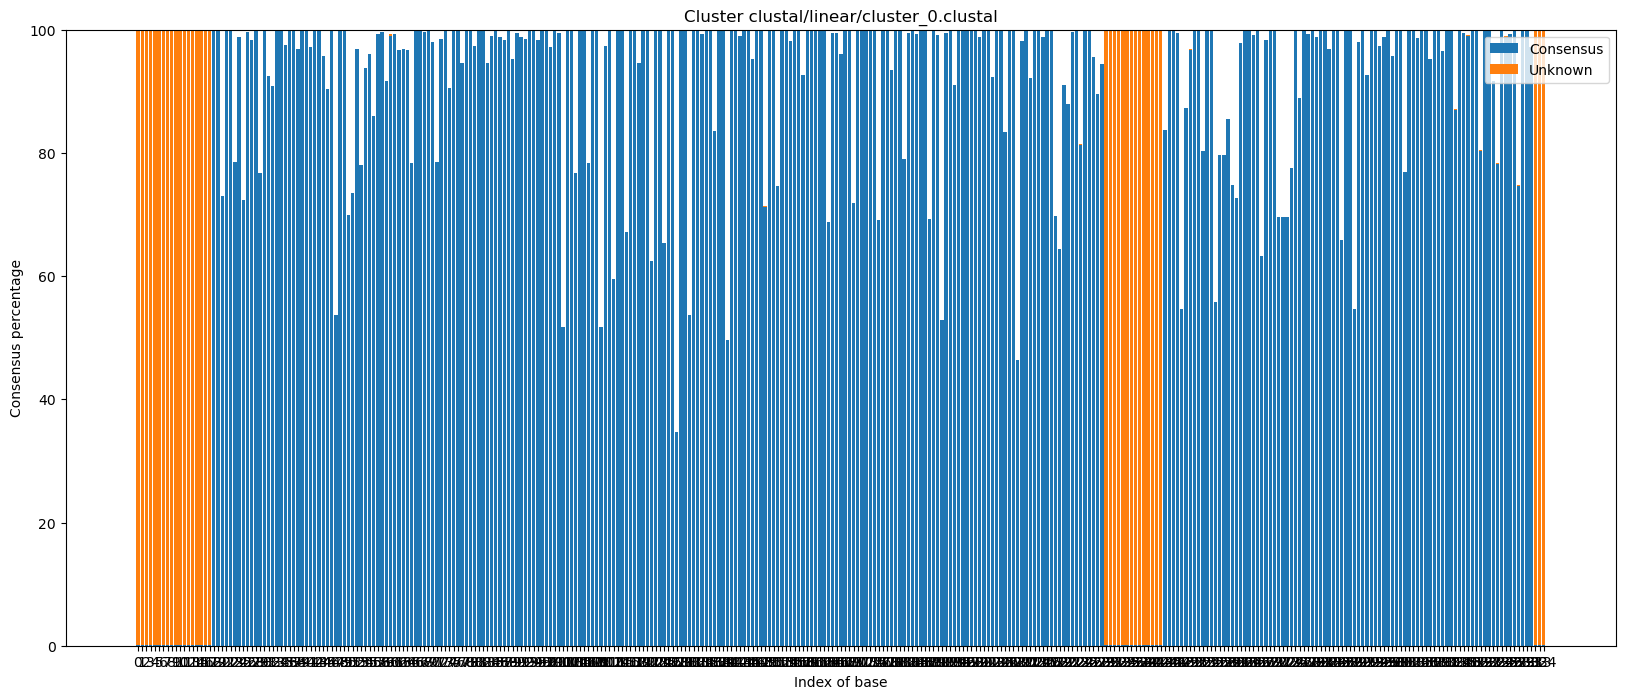

Plot for cluster 1


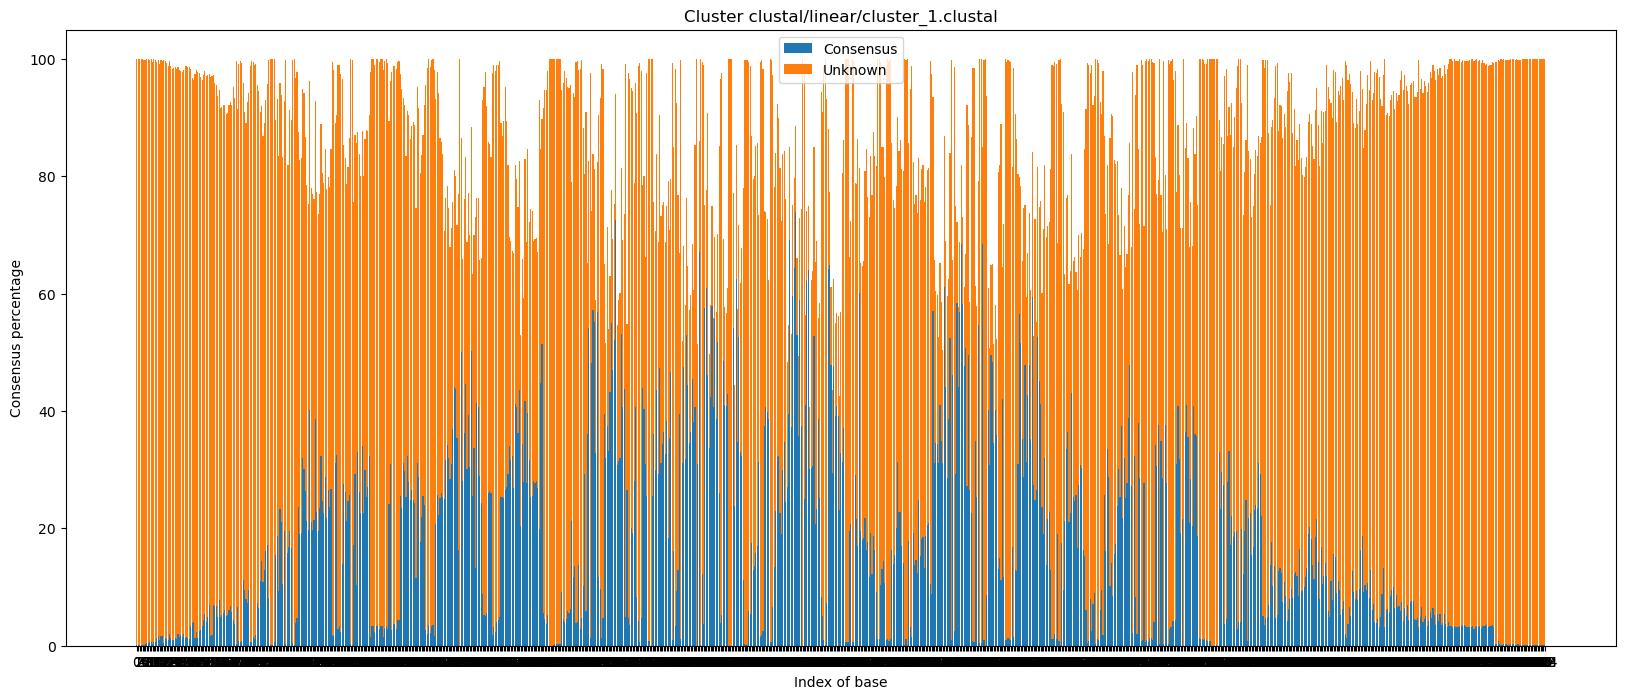

Plot for cluster 2


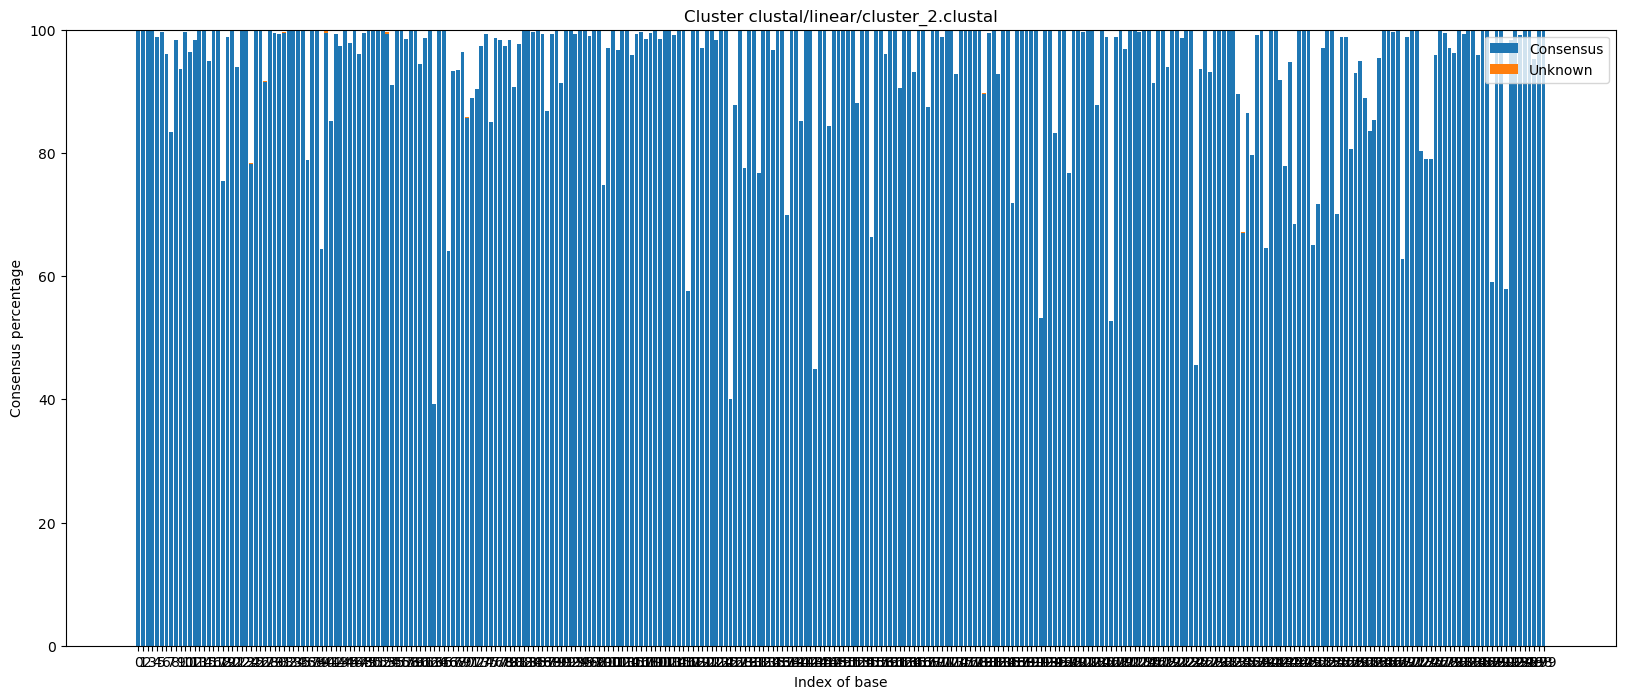

Plot for cluster 3


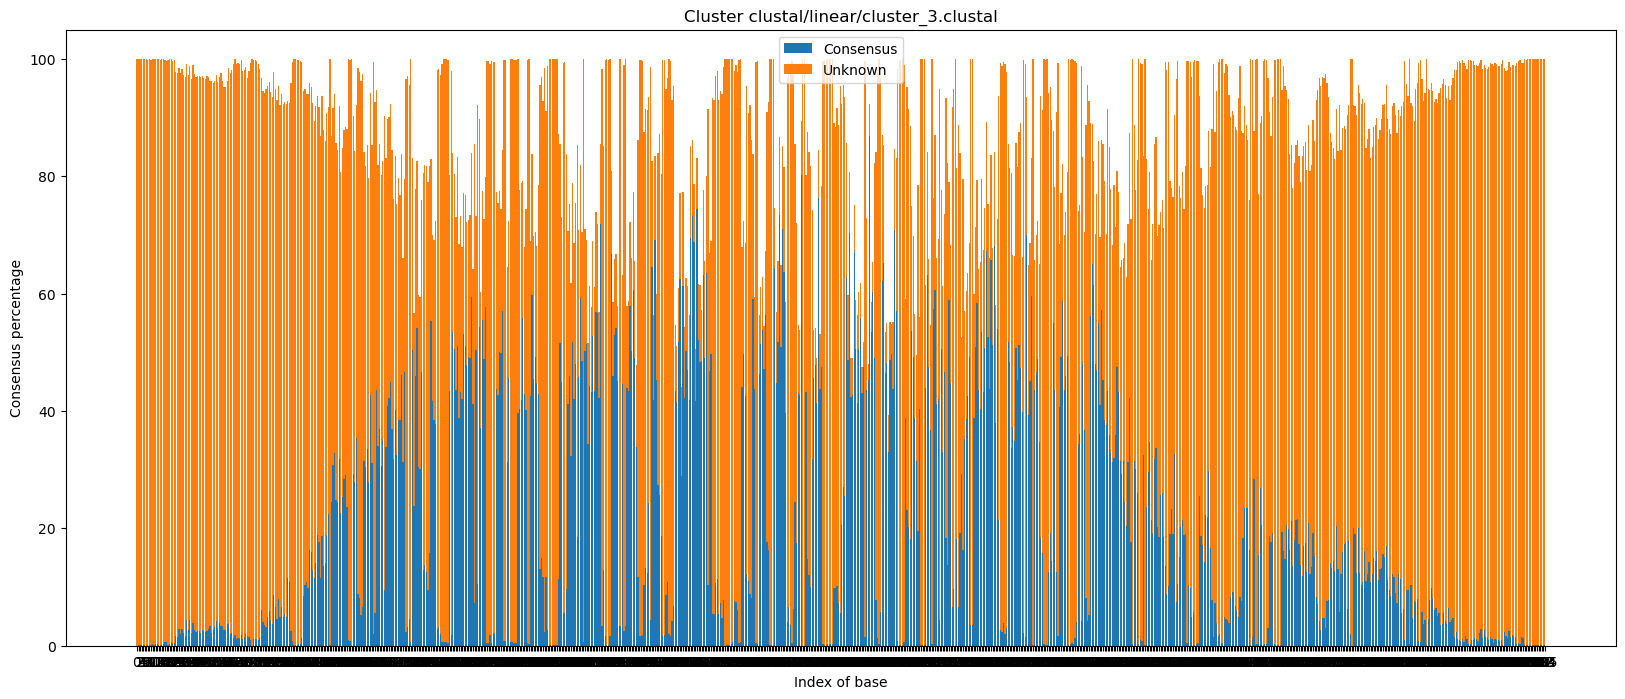

Plot for cluster 4


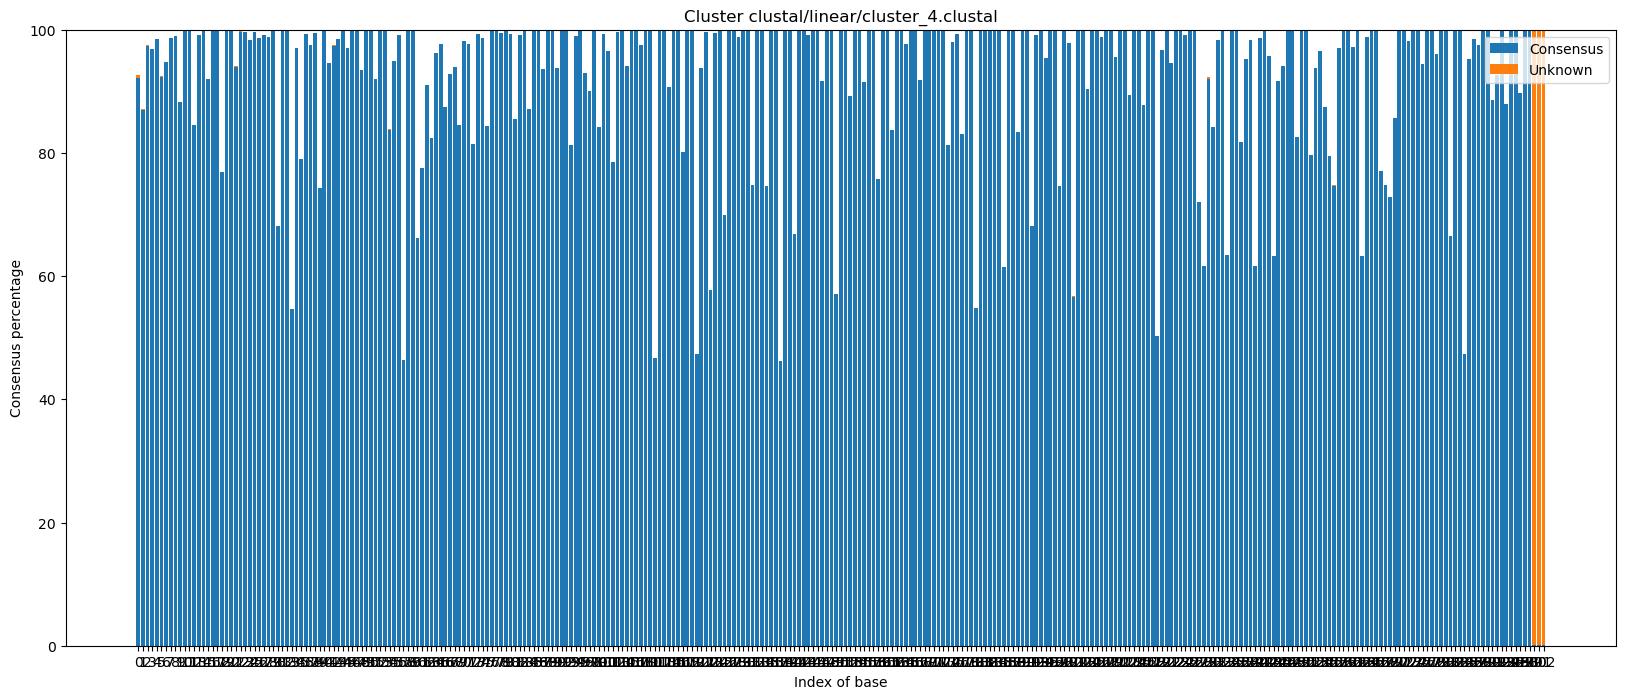

Plot for cluster 5


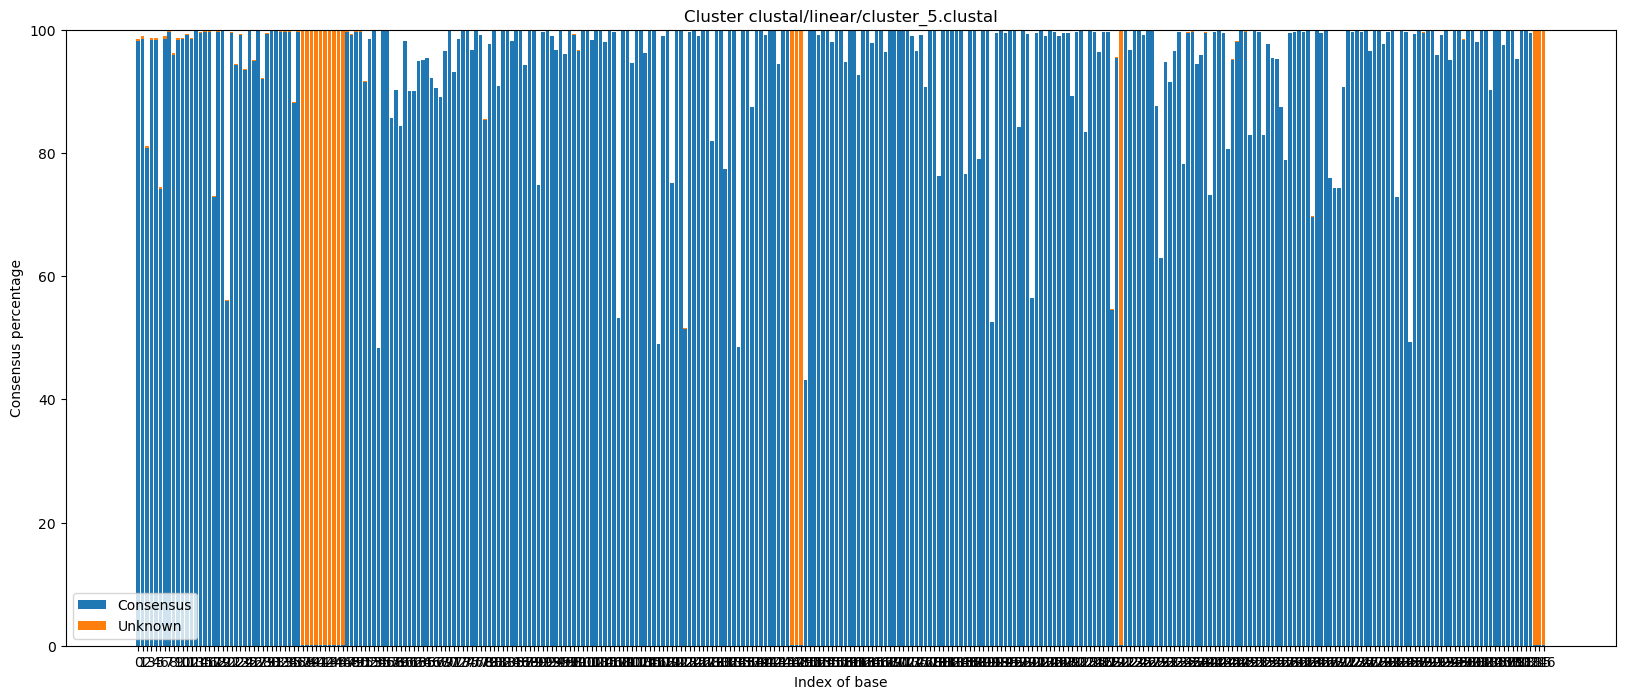

Plot for cluster 6


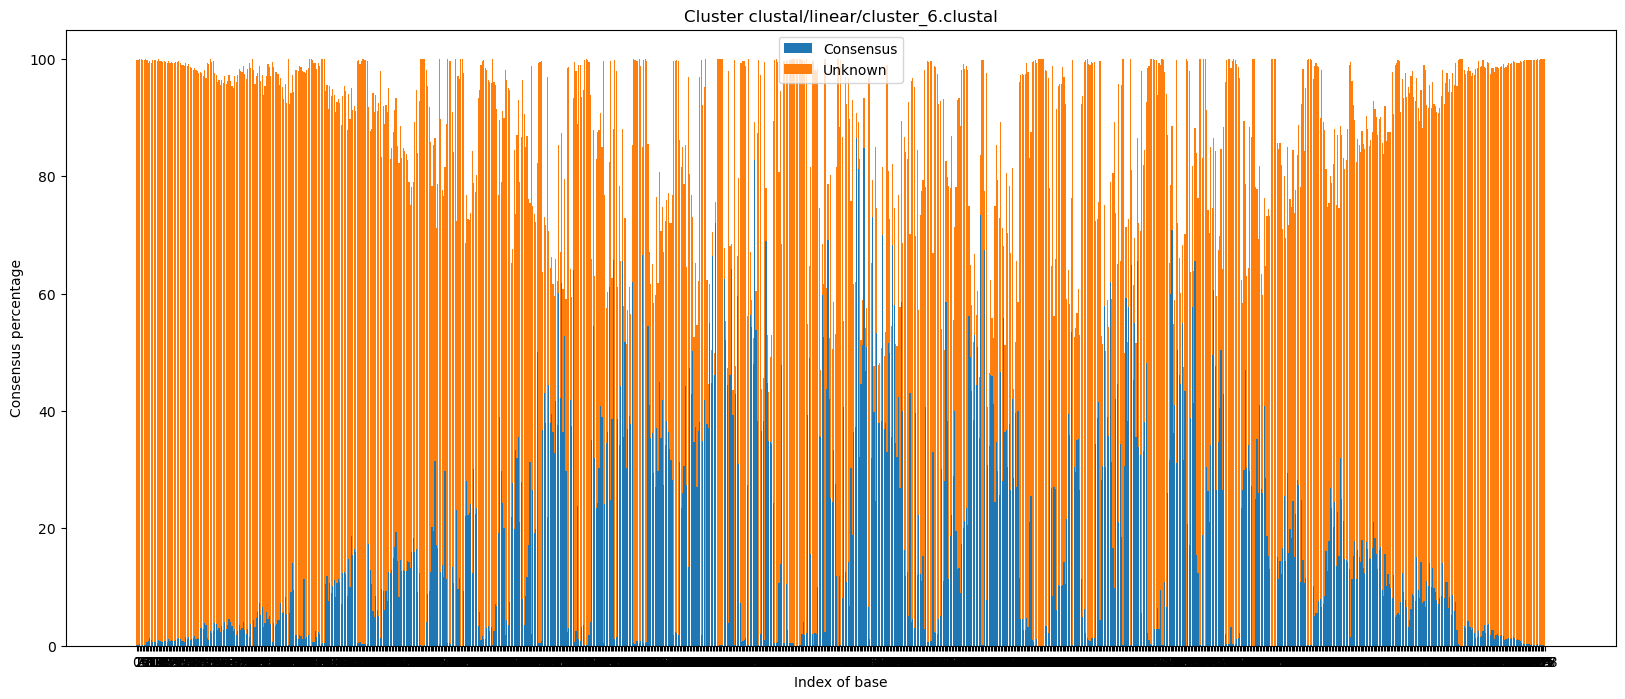

Plot for cluster 7


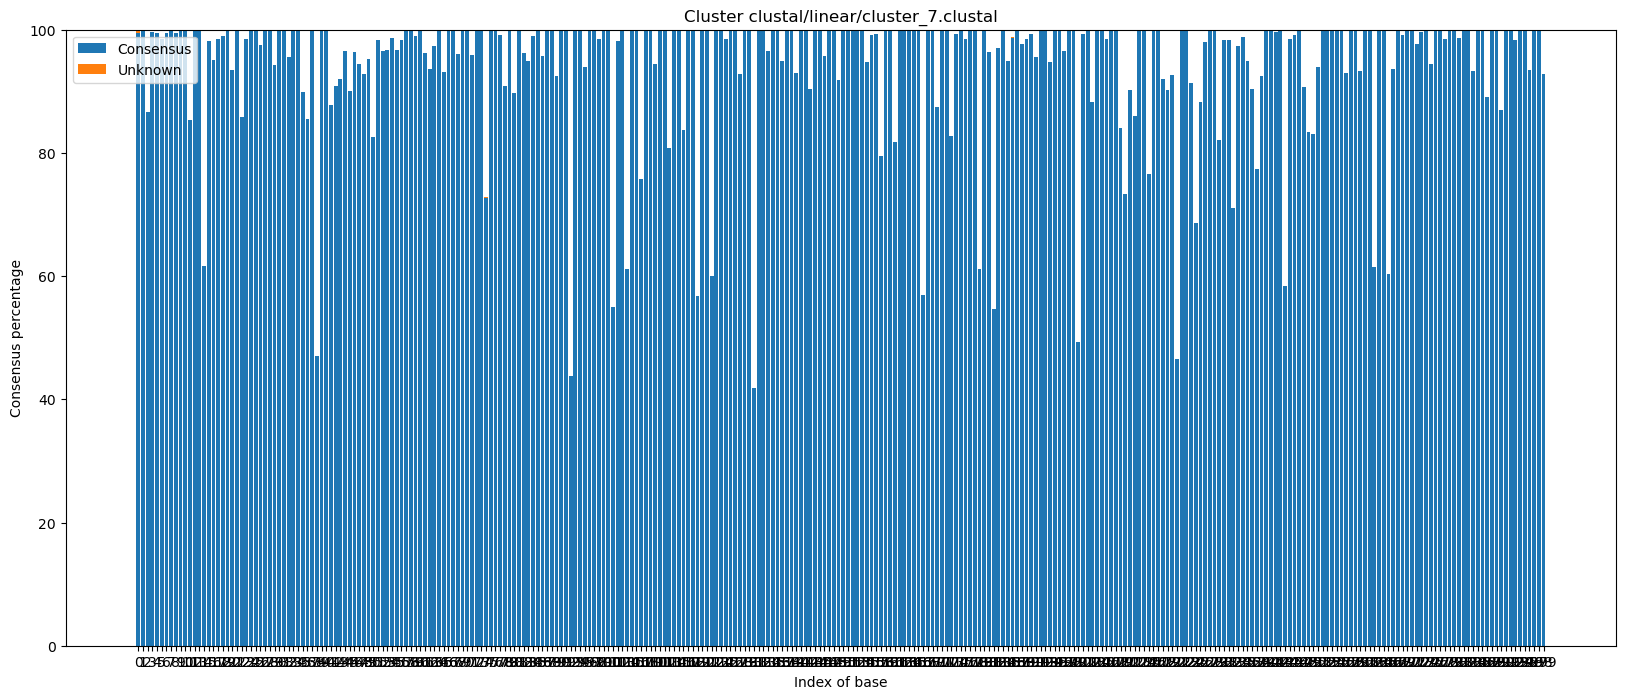

Plot for cluster 8


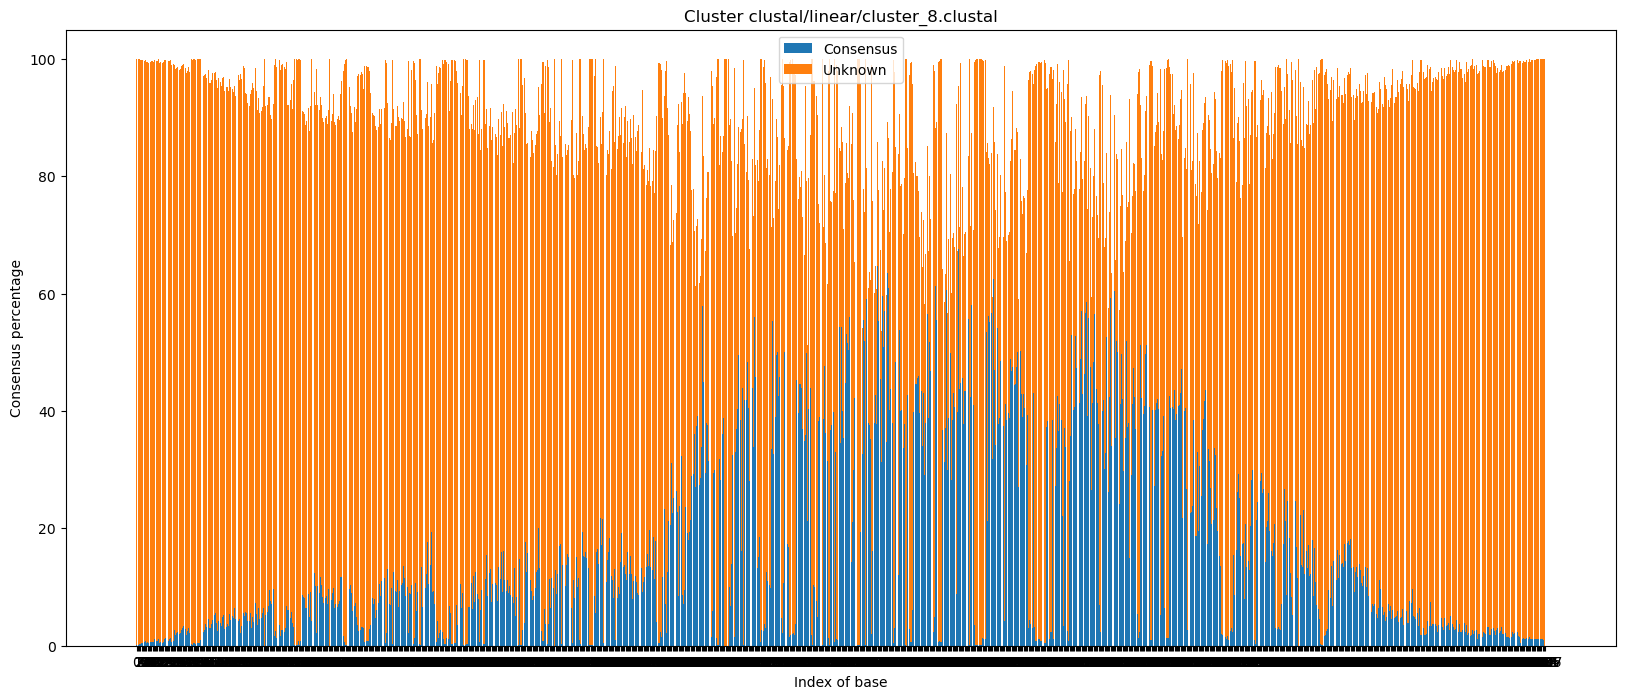

Plot for cluster 9


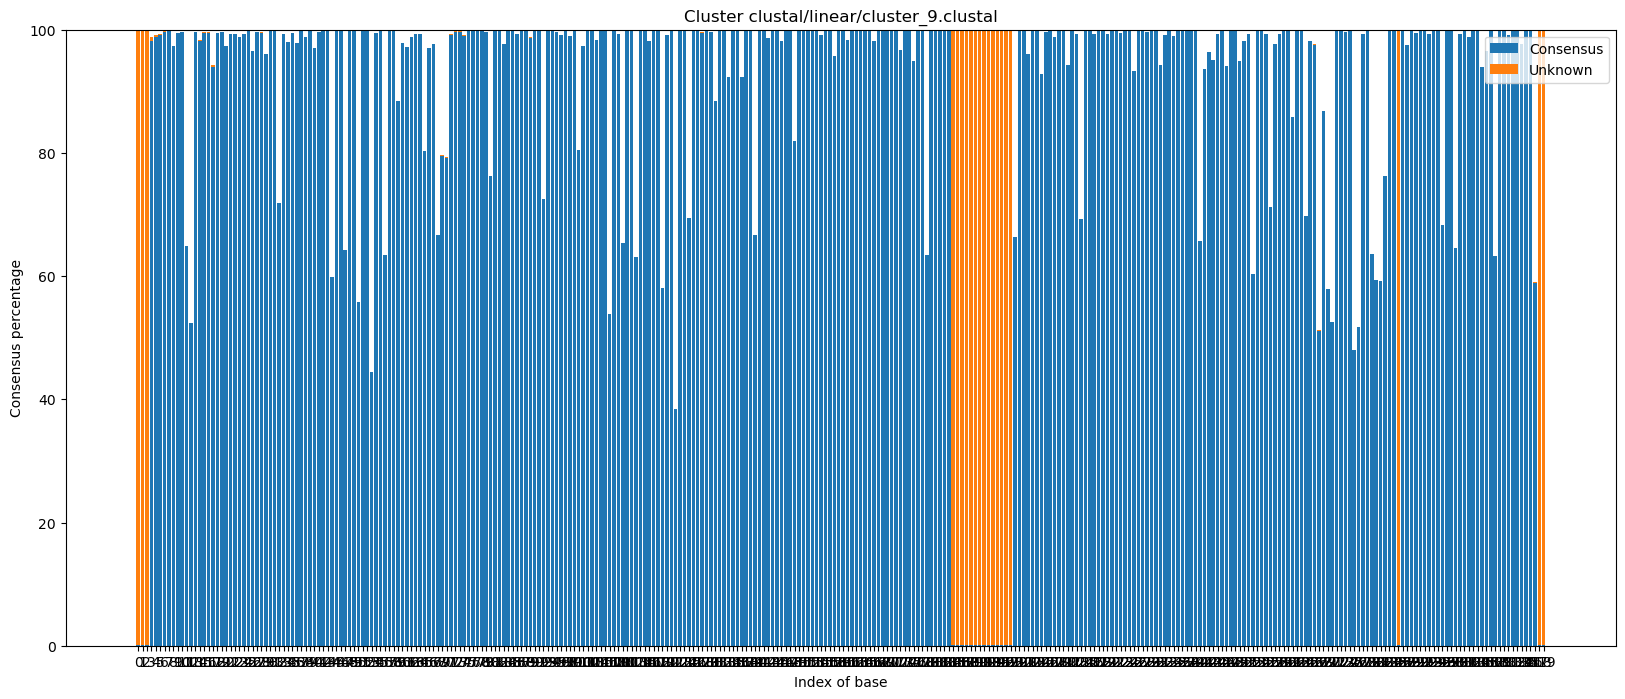

Plot for cluster 10


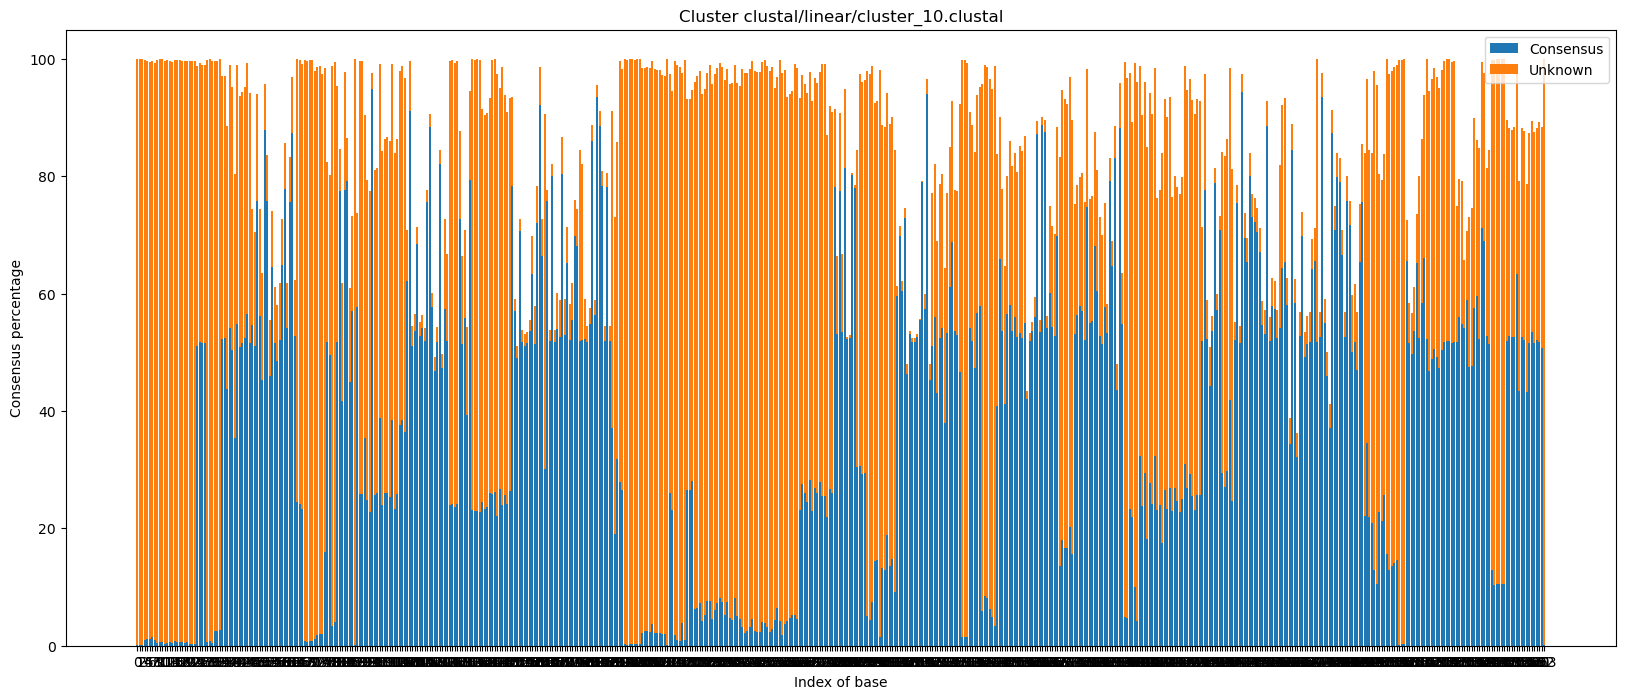

Plot for cluster 11


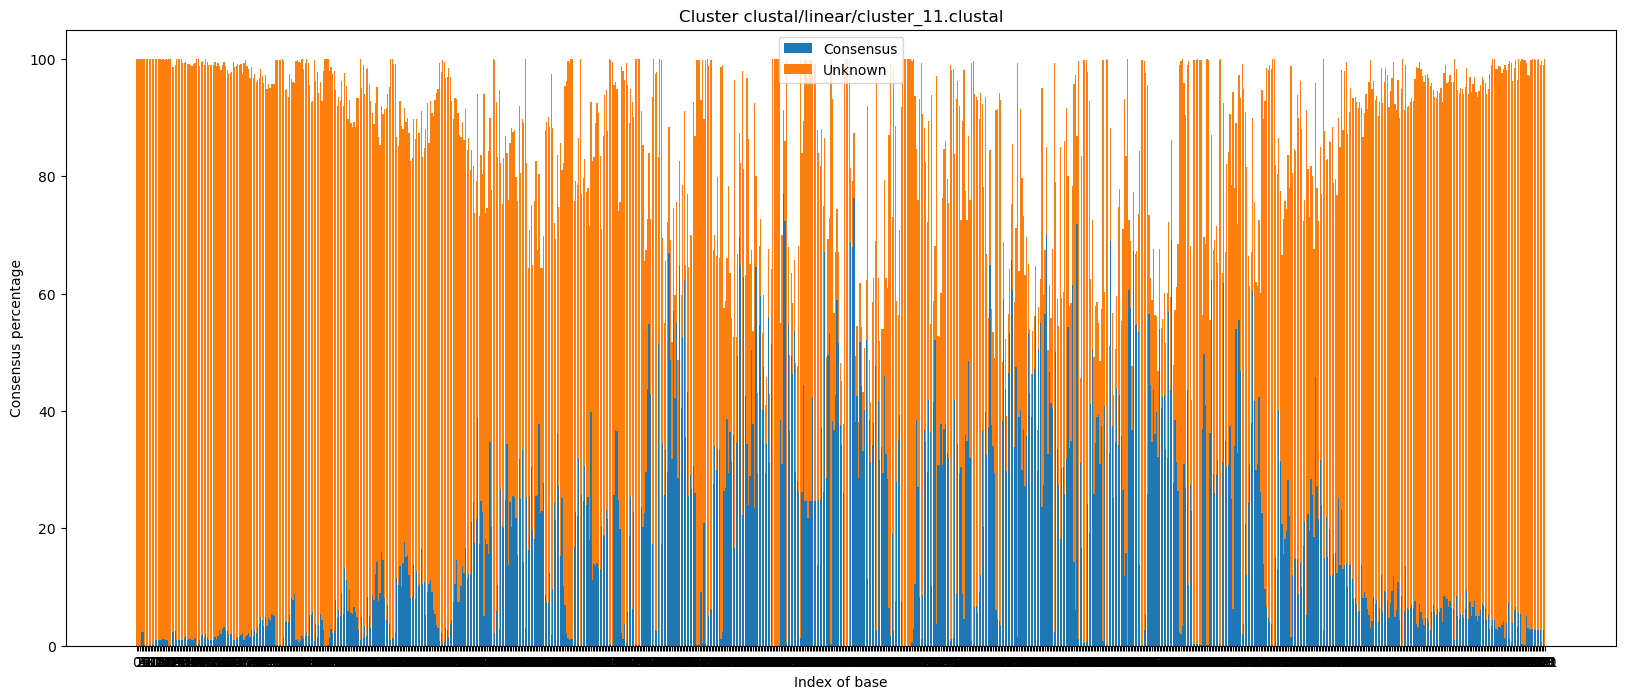

Plot for cluster 12


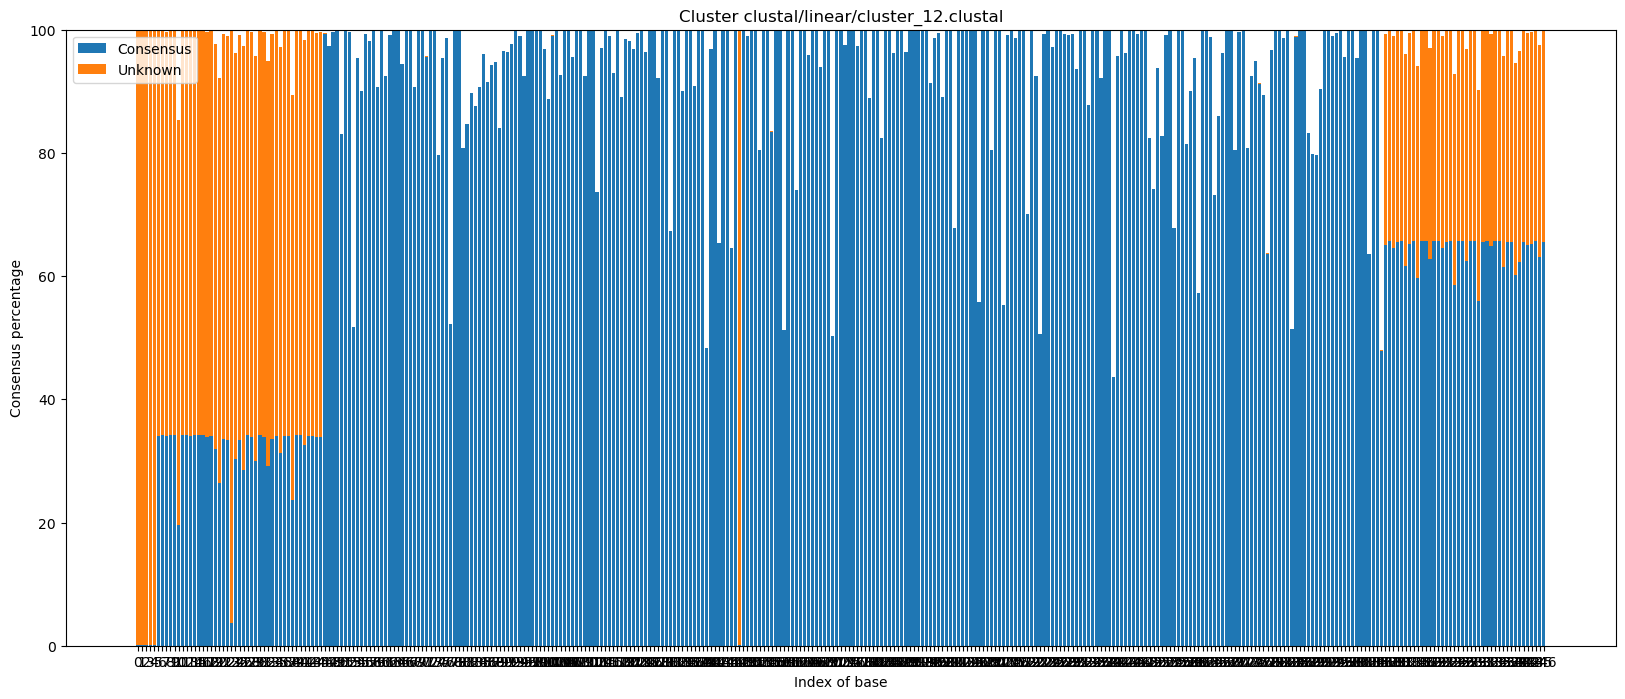

Plot for cluster 13


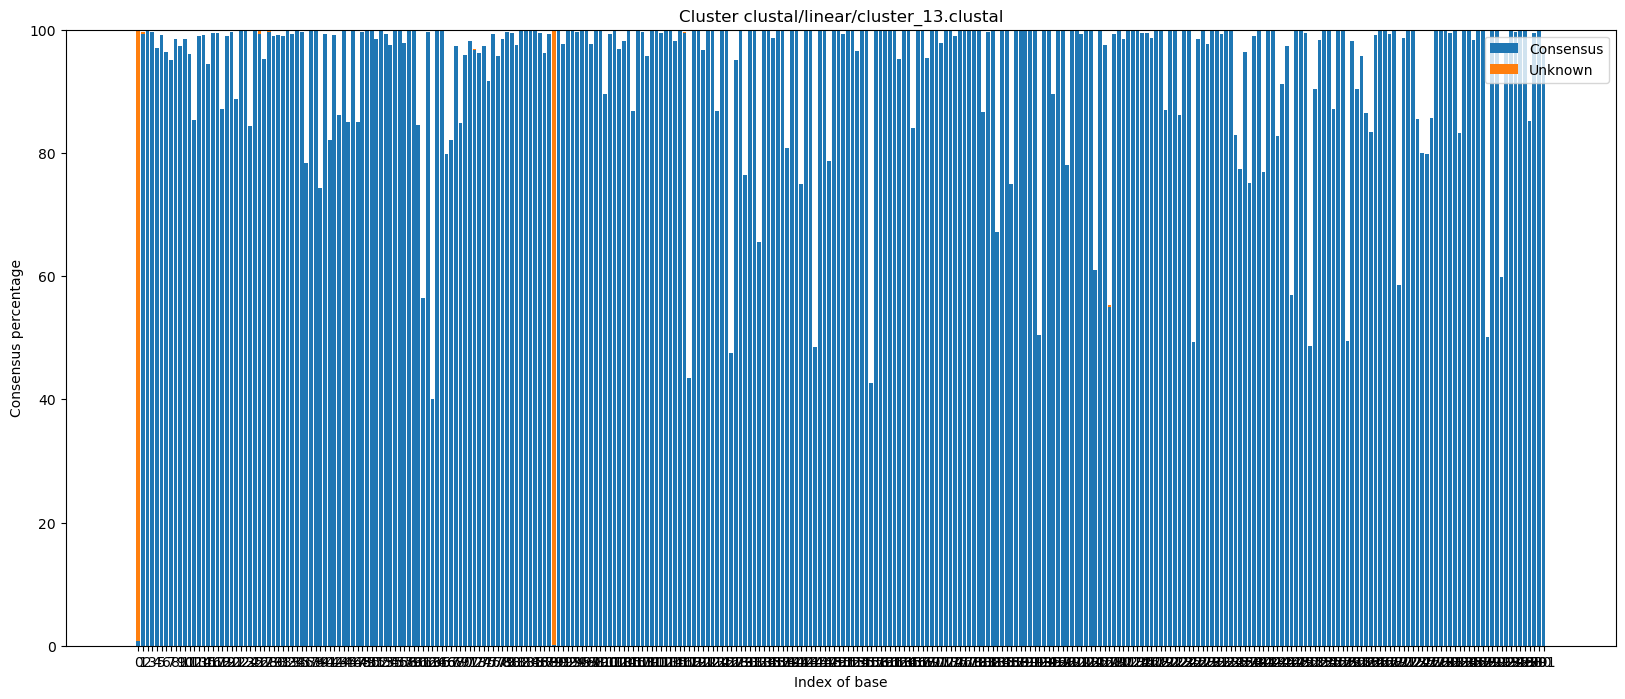

Plot for cluster 14


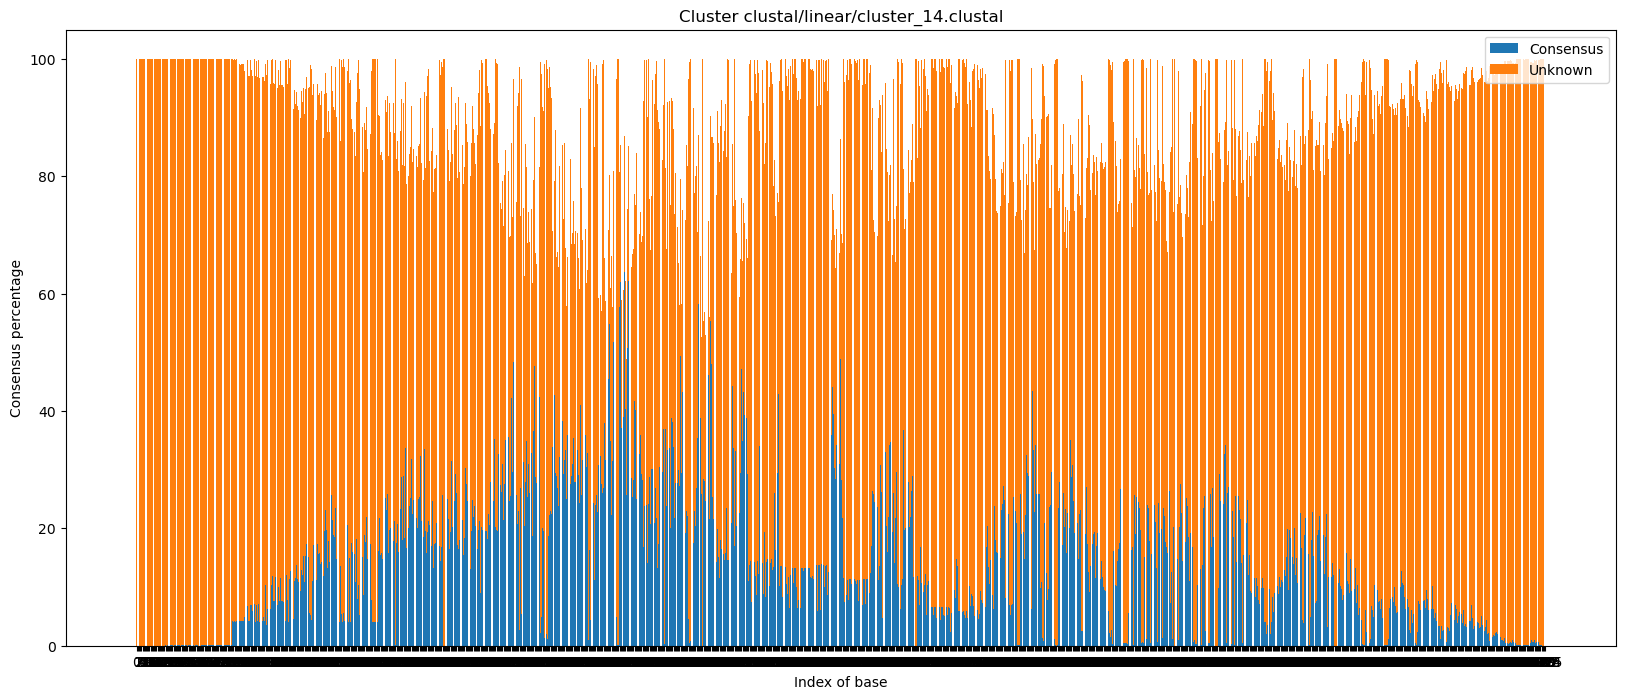

Plot for cluster 15


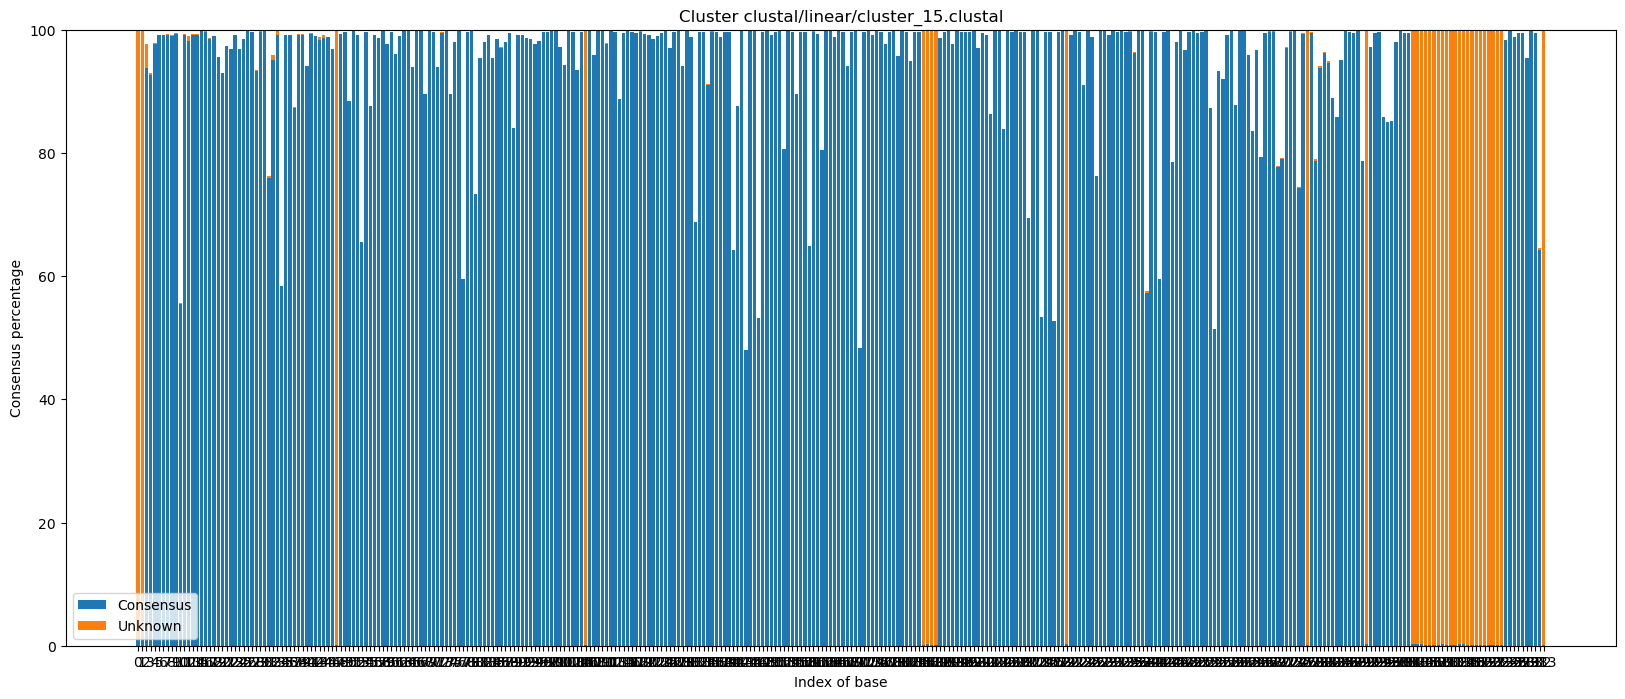

Plot for cluster 16


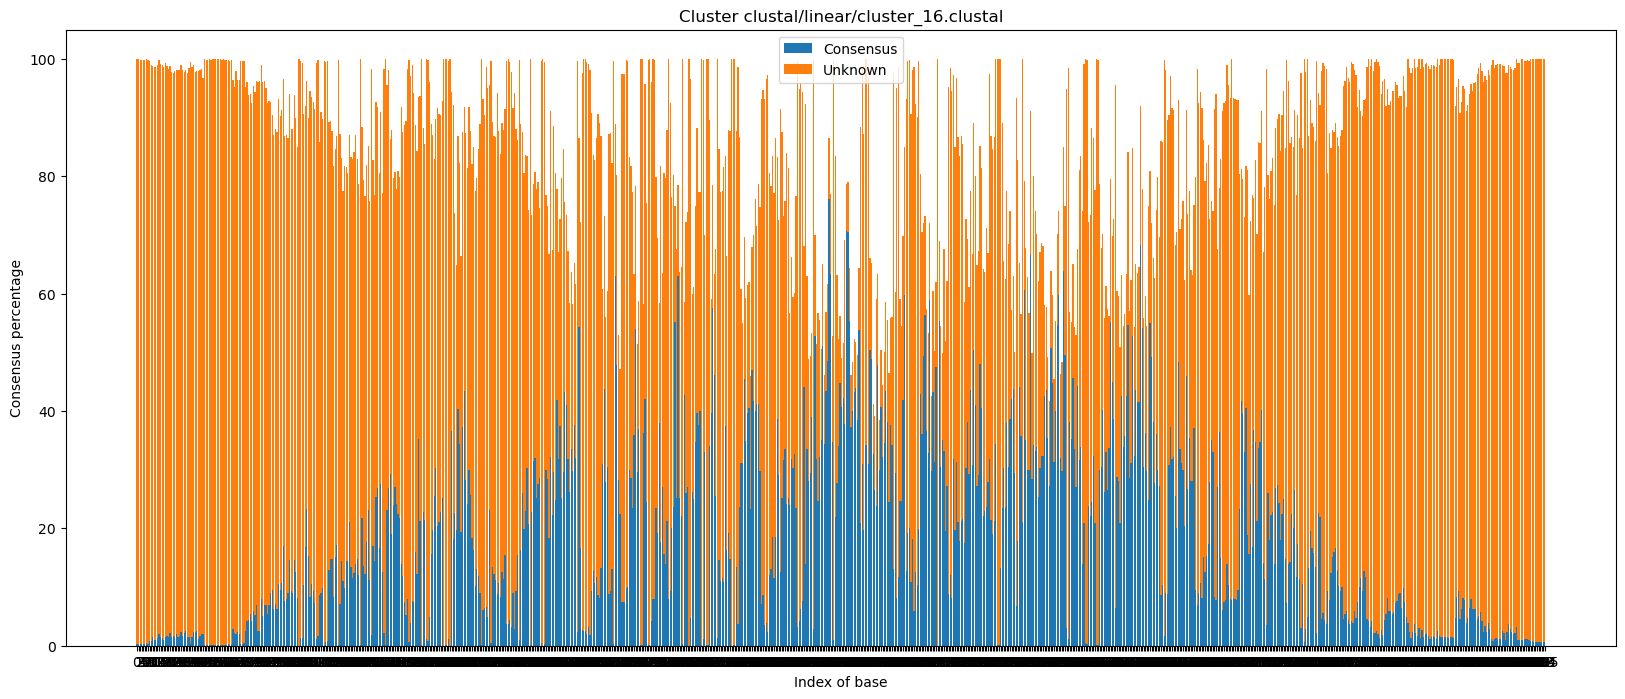

Plot for cluster 17


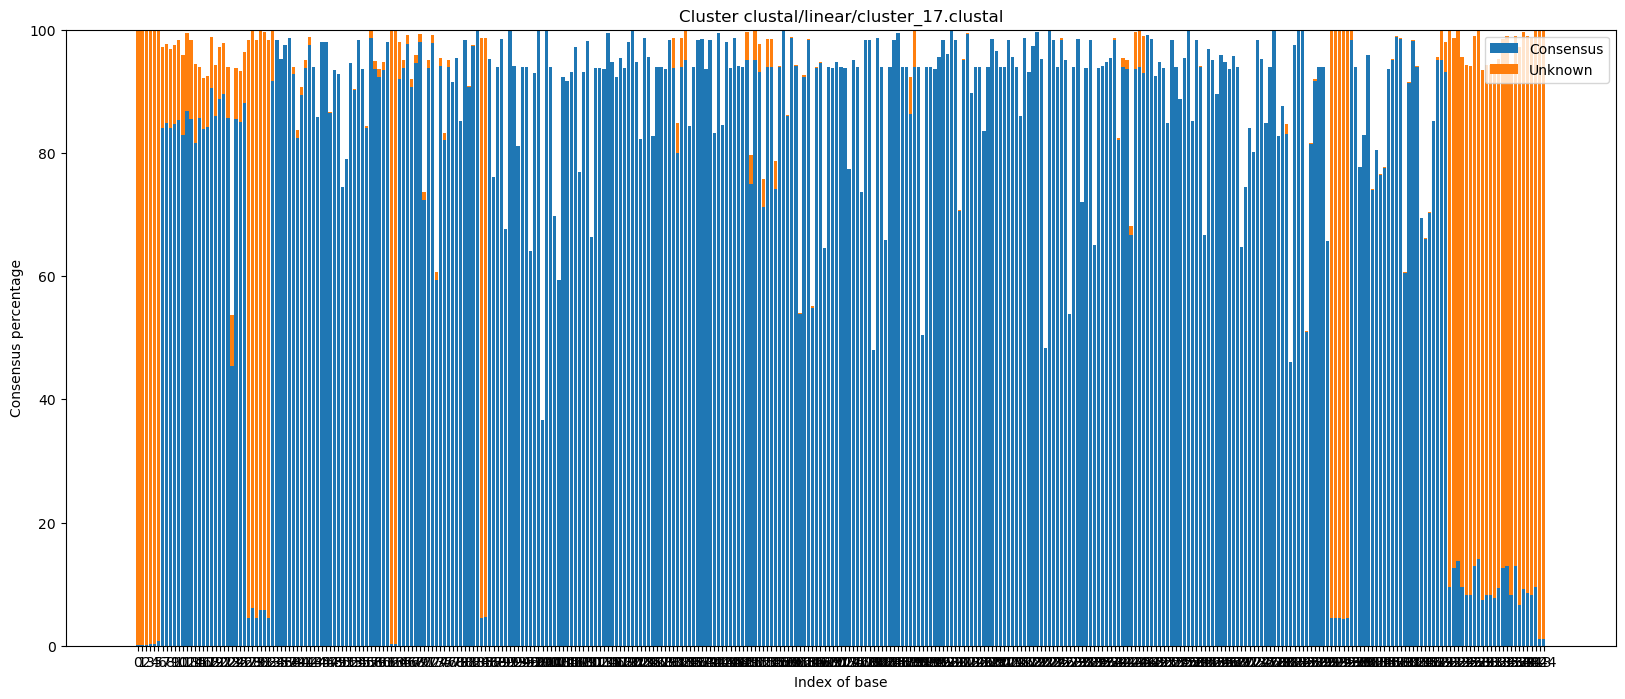

Plot for cluster 18


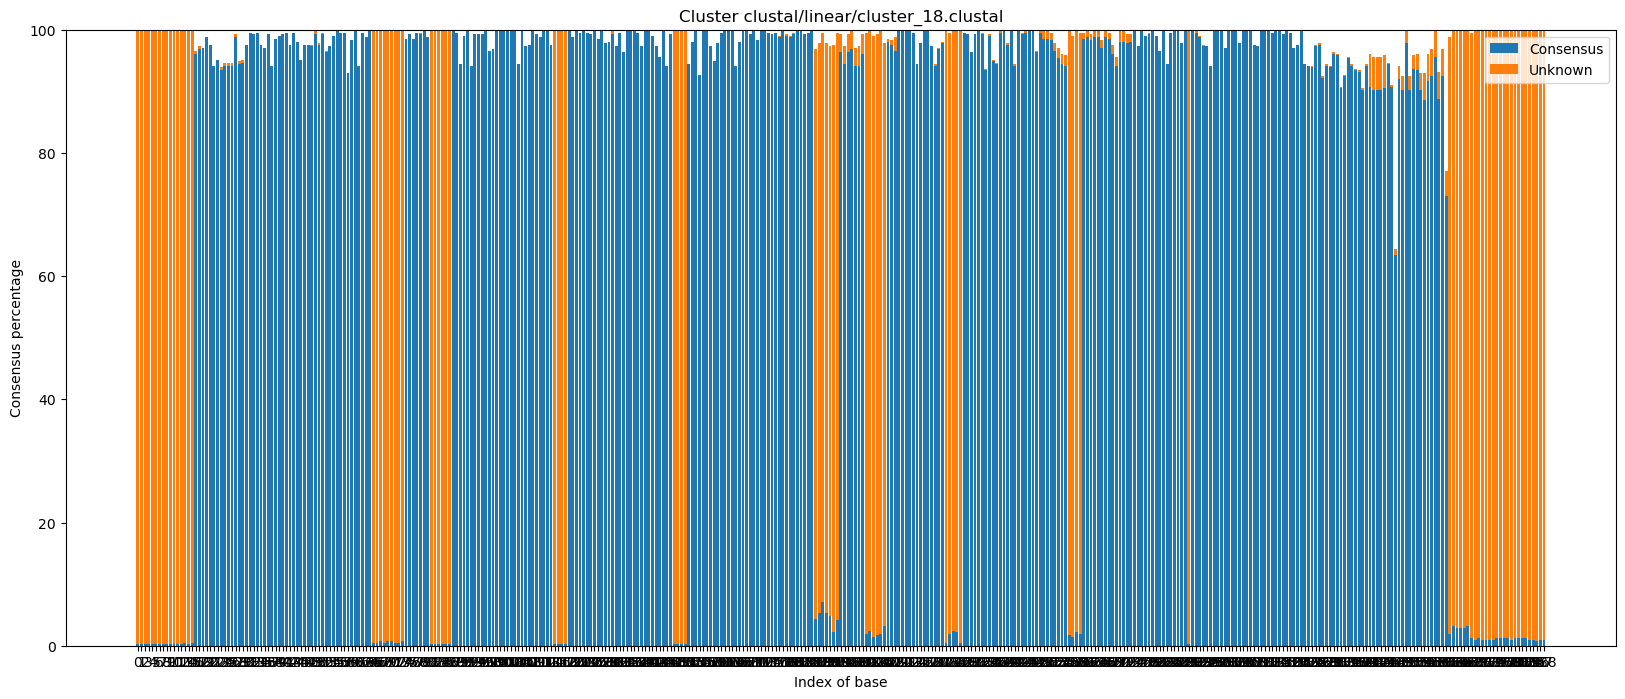

Plot for cluster 19


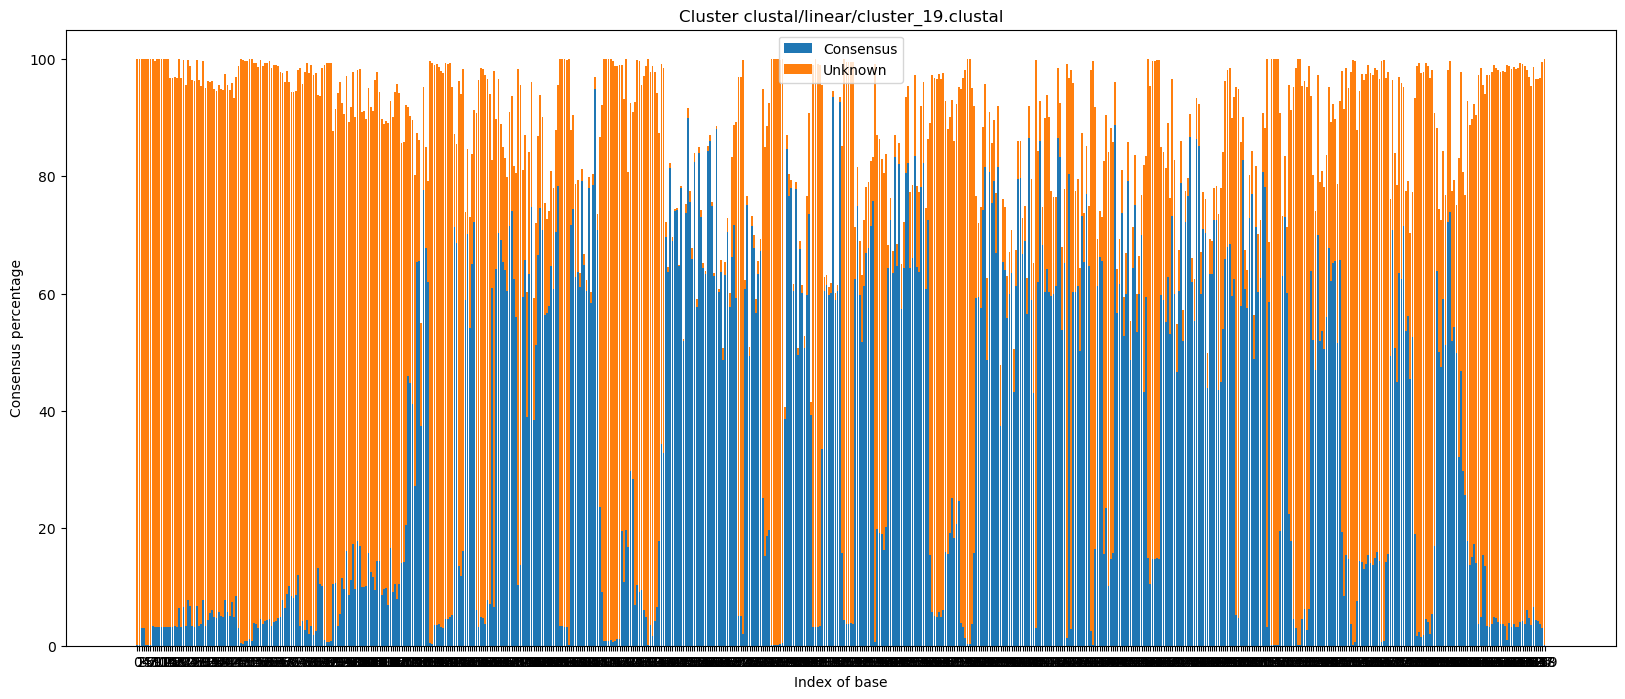

Plot for cluster 20


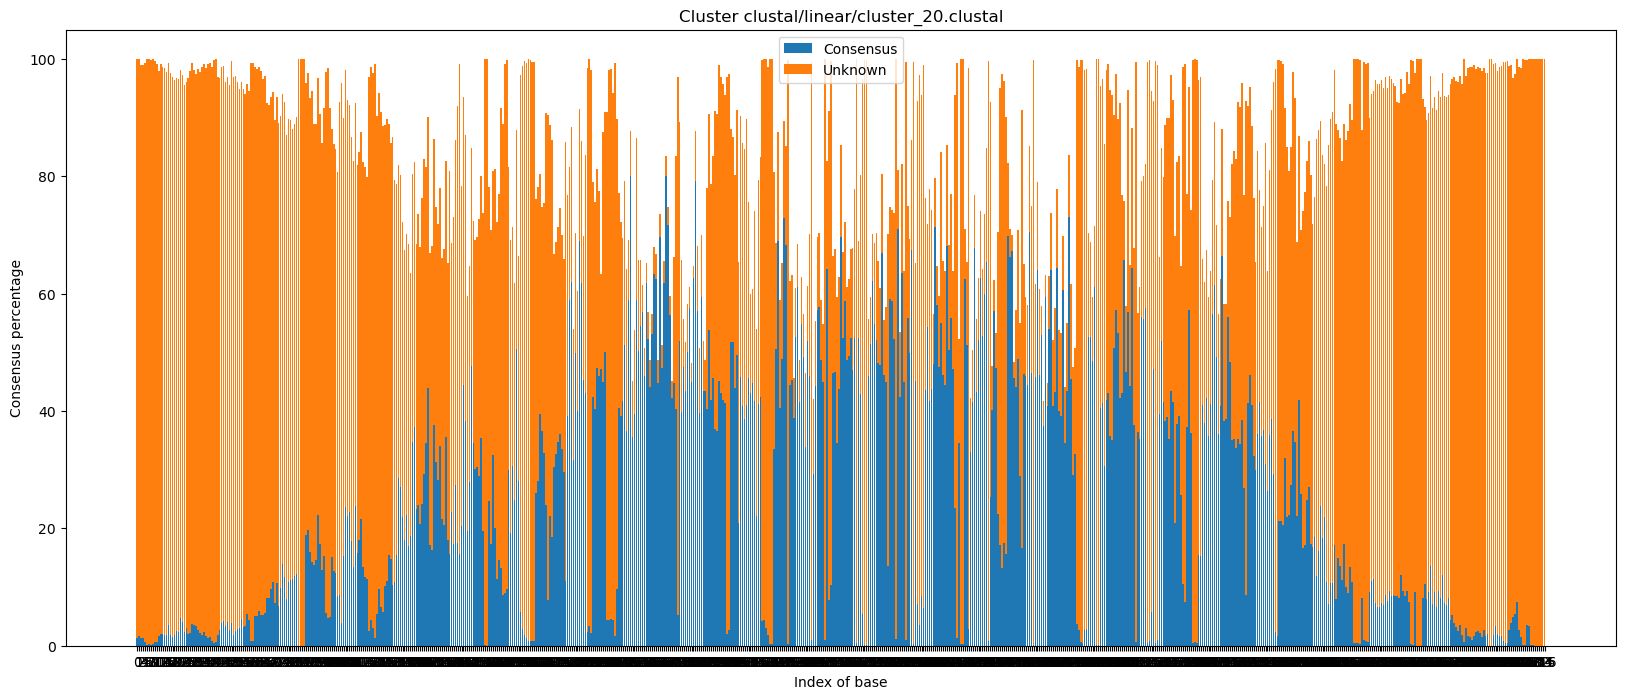

Plot for cluster 21


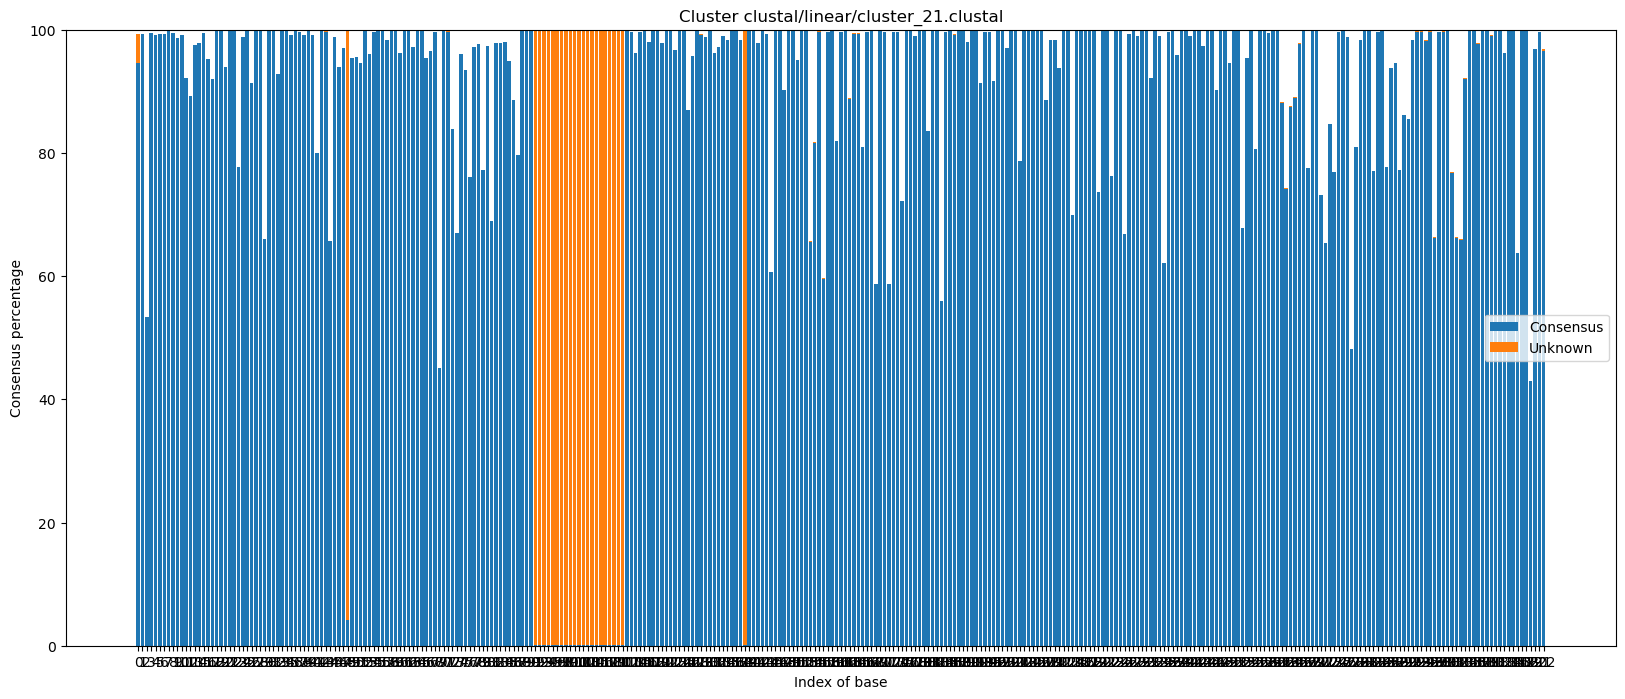

In [17]:
plotClusterRange("linear", 0, num_clusters, unique_labels)

In [10]:
print(np.mean(percentages))
print(np.median(percentages))
print(np.std(percentages))

32.38207345428952
17.125469034018476
28.789648055452417


In [11]:
scores, normalized_scores, sum_scores, div_scores = primerExtractionScoreOnModel("linear", cluster_labels, unique_labels, stride=1)

In [12]:
print(scores)
print(normalized_scores)
print(sum_scores)
print(div_scores)

[96.36833046471601, 0, 97.33472222222223, 0, 95.0578813250819, 96.58333333333333, 0, 96.44942528735632, 0, 98.04, 0, 0, 96.54729729729729, 96.0216606498195, 0, 96.49766718506999, 0, 92.56221198156682, 97.01951219512195, 0, 0, 96.13074204946996]
[2.2396  0.      2.80324 0.      5.22248 1.06628 0.      3.35644 0.
 1.56864 0.      0.      2.8578  1.06392 0.      1.24096 0.      1.60688
 0.79556 0.      0.      1.0882 ]
24.909999999999997
1.132272727272727


In [13]:
np.count_nonzero(normalized_scores)/len(unique_labels)

0.5454545454545454

In [14]:
sequences_list = list(SeqIO.parse("Data/rbcL.fasta" , "fasta"))
family_count_per_cluster, family_frequencies_per_cluster = getFamiliesPerCluster(cluster_labels, unique_labels, getIDs("Data/rbcL_ids.txt"), getIDFamilyMapping(sequences_list))

In [15]:
print(family_count_per_cluster)
print(family_frequencies_per_cluster)

{0: 522, 1: 2177, 2: 740, 3: 2098, 4: 1006, 5: 303, 6: 2532, 7: 704, 8: 2124, 9: 343, 10: 375, 11: 1984, 12: 767, 13: 335, 14: 1857, 15: 343, 16: 1976, 17: 402, 18: 24, 19: 968, 20: 1401, 21: 300}
{0: {'sativum': 1, 'variegata': 2, 'densata': 6, 'fanjingshanensis': 2, 'aestivum': 4, 'watanabei': 2, 'smithiana': 5, 'glaucescens': 1, 'cephalantha': 5, 'huangshanensis': 1, 'holophylla': 2, 'cyathophylloides': 2, 'communis': 2, 'sinensis': 3, 'heucherifolia': 1, 'jezoensis': 3, 'luzonicum': 1, 'laoshanensis': 4, 'wilsonii': 6, 'dichotoma': 3, 'batangensis': 3, 'grandiflora': 3, 'heteromera': 2, 'rupicola': 6, 'latum': 1, 'biglobosa': 33, 'duchartrei': 3, 'obovata': 6, 'sp.': 18, 'abies': 6, 'turbinata': 1, 'densiflora': 7, 'semi-infera': 7, 'beshanzuensis': 2, 'lobelioides': 2, 'basilicum': 1, 'griffithiana': 6, 'likiangensis': 24, 'futtereri': 1, 'nukiangensis': 3, 'enervis': 1, 'parviumbellata': 1, 'chinensis': 11, 'micranthum': 2, 'tongolensis': 4, 'lancifolia': 5, 'georgei': 4, 'lanceo